# Parameter changes in the "Tractable Buffer-Stock" model

This notebook provides functions for easily plotting the phase diagram of the "Tractable Buffer-Stock" model under different parameter combinations.

It is particularly helpful for considering the effect of a parameter change on the $\Delta m = 0$, $\Delta c = 0$, and stable loci and check one's intuition.

## Some setup

I first load all the necessary tools from HARK, and define some functions that plot the loci and compute the steady-state saving rate.

In [1]:
%matplotlib inline

# Setup
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import HARK
import HARK.ConsumptionSaving.ConsumerParameters as Params # Import default parameters
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType
import copy

def m0locus(agent,m):
    r_curs = agent.Rfree/(agent.PermGroFac/(1-agent.UnempPrb))
    c = 1/r_curs + (1-1/r_curs)*m
    return(c)

def c0locus(agent,m):
    moh = agent.UnempPrb
    rho = agent.CRRA
    gamma = agent.PermGroFac/(1-agent.UnempPrb)
    R = agent.Rfree 
    beta = agent.DiscFac
    
    thorn = (R*beta)**(1/rho) 
    
    R_curs = R/gamma
    kappa = (1-thorn/R)
    Pi = (((thorn/gamma)**(-rho)-(1-moh))/(moh))**(1/rho)
    return(m*(R_curs*kappa*Pi)/(R_curs*kappa*Pi+1))

def ss_income(agent):
    
    gamma = agent.PermGroFac/(1-agent.UnempPrb)
    R = agent.Rfree
    a1 = (agent.mTarg - 1)/R
    return(1+(R-1)*a1)

## The main function

The main function runs what I call "an experiment". It receives an agent with the base parameters, the name of the particular parameter that you want to change, and a list of values for that parameter.

It then draws the phase diagram and computes the steady-state saving rate for each value of the parameter of interest, leaving the others fixed.

In [2]:
def experiment(agentOrig,param,values,m):
    '''
    - agentOrig: a TBSagent object with the 'base' parameters
    - param: a string with the name of the parameter that you want to change.
    - valies: a list of values for that parameter.
    - m: a grid of 'normalized market resources' over which to plot the phase diagram 
    '''
    agent = copy.deepcopy(agentOrig)
    colors = cm.get_cmap('viridis', len(values))
    plt.figure()
    for i in range(len(values)):
        
        col = colors(i/len(values))
        
        # Create agent
        setattr(agent,param,values[i])
        agent.solve()

        plt.plot(m,m0locus(agent,m),'--',color = col)
        plt.plot(m,c0locus(agent,m),'--k', color = col)
        
        plt.plot(m, agent.solution[0].cFunc(m), label='%s = %1.3f' %(param,values[i]), color = col, linewidth = 3)
        target = agent.mTarg
        plt.plot(target,agent.solution[0].cFunc(target),'.k')
        
        s_rate = (ss_income(agent) - agent.solution[0].cFunc(target))/ss_income(agent)
        print("SS. Saving rate at %s = %1.3f is %1.3f" % (param,values[i],s_rate))
        
    plt.legend()

## An example of how to use the function

The first step is to create a TBS agent, and a grid for market resources.

In [3]:
# Examples

CRRA       = Params.CRRA 
Rfree      = Params.Rfree 
DiscFac    = Params.DiscFac
PermGroFac = Params.PermGroFac
rfree      = Rfree-1

# Parameter dictionary for the TBS agent
TBS_params =  {'UnempPrb' : .005,
               'DiscFac' : DiscFac,
               'Rfree' : Rfree,
               'PermGroFac' : PermGroFac[0],
               'CRRA' : CRRA}

TBSagent = TractableConsumerType(**TBS_params)

# market resources grid
m = np.linspace(0,20,100)

Consider now the effect of the permanent income growth factor changing from $1$ to $1.2$. We can easily see the effect through:

SS. Saving rate at PermGroFac = 1.000 is 0.058
SS. Saving rate at PermGroFac = 1.020 is 0.161


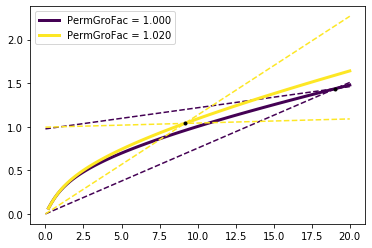

In [4]:
# G
G = [1.0,1.02]
experiment(TBSagent,'PermGroFac',G,m)

And you can do these experiments for any parameter you'd like, with as many parameter values as your eyes can tell apart. Some examples below.

SS. Saving rate at Rfree = 1.000 is 0.159
SS. Saving rate at Rfree = 1.001 is 0.156
SS. Saving rate at DiscFac = 0.900 is 0.044
SS. Saving rate at DiscFac = 0.930 is 0.068
SS. Saving rate at DiscFac = 0.950 is 0.098
SS. Saving rate at UnempPrb = 0.001 is 0.050
SS. Saving rate at UnempPrb = 0.008 is 0.161
SS. Saving rate at CRRA = 2.000 is 0.121
SS. Saving rate at CRRA = 3.000 is 0.161


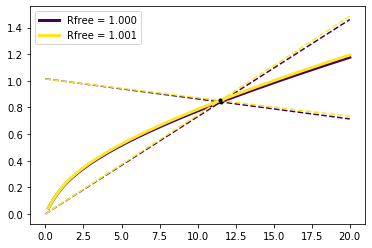

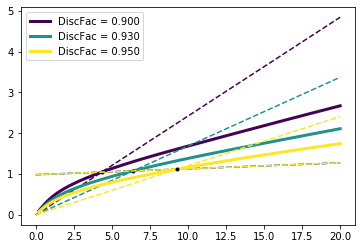

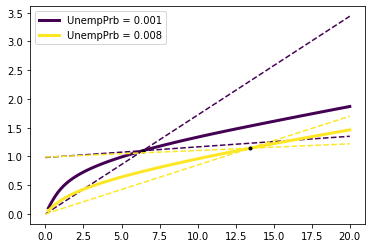

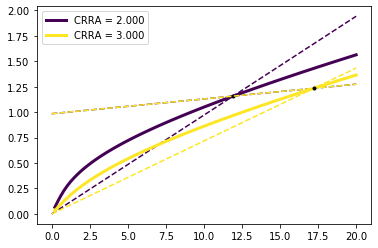

In [16]:
# The risk-free return.
R = [1.0,1.001]
experiment(TBSagent,'Rfree',R,m)

# The time discount factor.
Beta = [0.9,0.93,0.95]
experiment(TBSagent,'DiscFac',Beta,m)

# The probability of unemployment
ohm = [0.001,0.008]
experiment(TBSagent,'UnempPrb',ohm,m)

# The coefficient of relative risk aversion
rho = [2,3]
experiment(TBSagent,'CRRA',rho,m)